Step 1: Load the Data

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Step 2:  Visualizing the Data

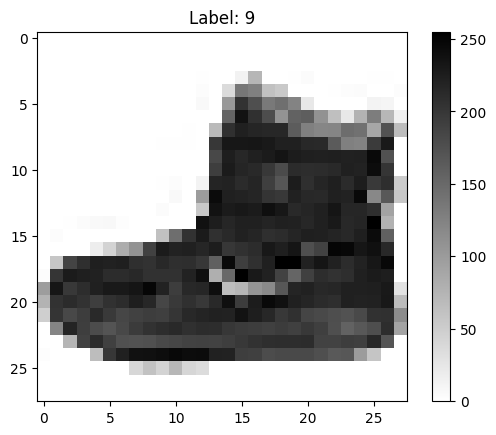

In [4]:
import matplotlib.pyplot as plt

# Function to display an image from the dataset
def display_image(index):
    plt.figure()
    plt.imshow(x_train[index], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.title(f"Label: {y_train[index]}")
    plt.show()

# Display the first image in the training dataset
display_image(0)

Step 3: Preprocessing the Data

 Normalize the X train and X test data by dividing by the max value of the image arrays

In [5]:
# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

Step 4: Reshape the Data

In [7]:
# Reshape the data to include the channel dimension (required for CNNs)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

Step 5: One-Hot Encode the Labels

In [8]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Step 6: Create the Model

In [9]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Step 7: Train the Model

In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1784 - accuracy: 0.9375 - val_loss: 0.4027 - val_accuracy: 0.9046
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1718 - accuracy: 0.9406 - val_loss: 0.3520 - val_accuracy: 0.9024
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1733 - accuracy: 0.9395 - val_loss: 0.3842 - val_accuracy: 0.8861
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1738 - accuracy: 0.9408 - val_loss: 0.3822 - val_accuracy: 0.9023
Epoch 5/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1686 - accuracy: 0.9418 - val_loss: 0.3547 - val_accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1721 - accuracy: 0.9415 - val_loss: 0.3676 - val_accuracy: 0.8998
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1682 - accuracy: 0.9426 - val_loss: 0.4977 -

Step 8: Evaluate the Model

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 4s - loss: 0.4386 - accuracy: 0.8975 - 4s/epoch - 12ms/step

Test accuracy: 0.8974999785423279


Step 9: Show the Accuracy, Precision, Recall, and F1-Score

313/313 [==============================] - 7s 21ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.78      0.89      0.83      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.87      0.80      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.74      0.68      0.70      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



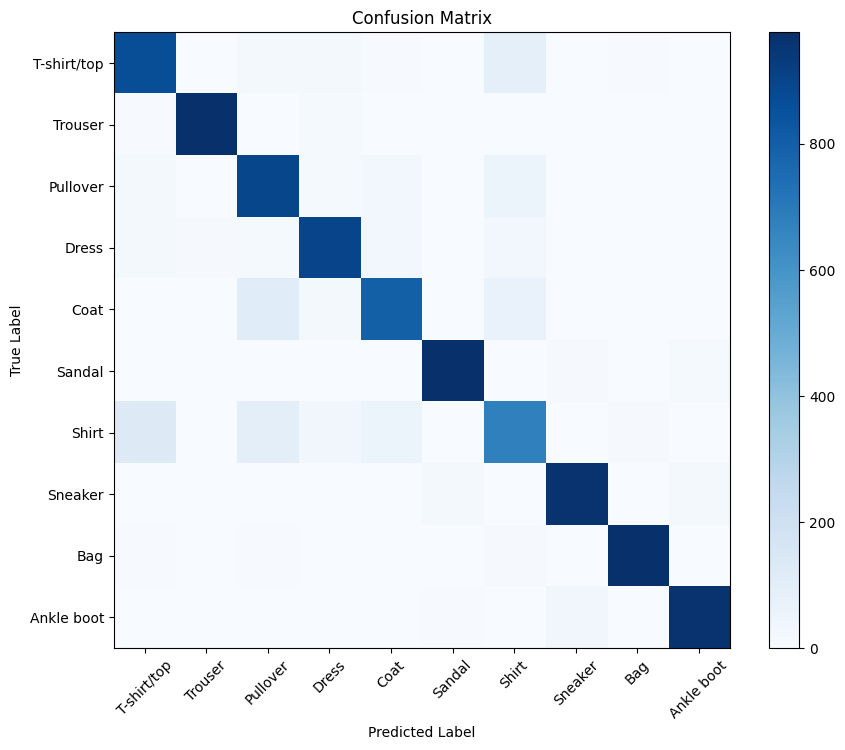

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=[
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(range(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], rotation=45)
plt.yticks(range(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()